In [1]:
import numpy as np
import pandas as pd
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search
import json
import requests
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# create a client instance of the library
#elastic_client = Elasticsearch(timeout=60, max_retries=10, retry_on_timeout=True)
#elastic_client.cluster.health(wait_for_status='yellow', request_timeout=55)

In [2]:
import pickle
pickle_dir = 'D:\\Code\\datascience\\MA_NFT\\data\\pickle\\'
def load_pickle(name):
    with open(pickle_dir + name + '.pkl', 'rb') as f:
        return pickle.load(f)
df = load_pickle('df_before_norm.pkl')

In [3]:
len(df)

1150715

In [4]:
df.keys()

Index(['creator', 'price_crypto', 'sale_usd', 'description', 'is_animation',
       'name', 'collection_name', 'collection_description', 'contract_scheme',
       'sale_token', 'id', 'instagram', 'twitter', 'img_path',
       'twitter_follower', 'preview_path', 'sale_time',
       'collection_created_year', 'image_path', 'word_count_coll_desc',
       'unique_asset', 'instagram_account', 'twitter_account'],
      dtype='object')

In [3]:
df['sale_time'].value_counts()

5     53509
1     52470
6     52377
22    51639
8     51311
4     50928
3     50681
7     50405
23    50388
16    50182
2     49722
21    49299
9     49293
15    49013
20    45410
18    45256
0     44980
17    44378
14    43866
19    43851
10    43843
13    43353
11    42596
12    41965
Name: sale_time, dtype: int64

<AxesSubplot:>

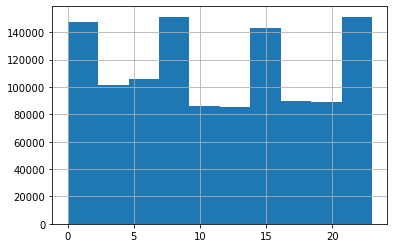

In [4]:
df['sale_time'].hist()

C:\Users\bb1\miniconda3\envs\deep\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sale_time', ylabel='Density'>

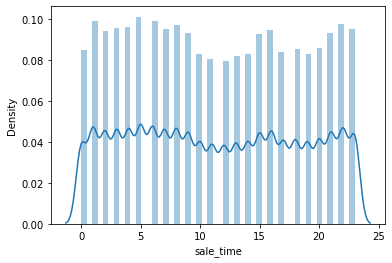

In [9]:
sns.distplot(df['sale_time'])

In [ ]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

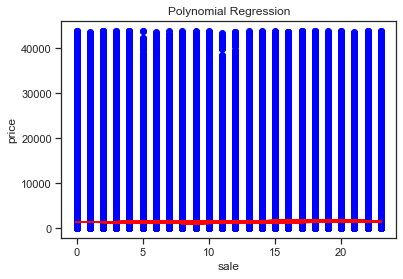

In [32]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'blue')
 
plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('sale')
plt.ylabel('price')
 
plt.show()

## Images dicovering

In [7]:
max(df['sale_usd'])

6195956.0

In [20]:
df['sale_usd'].sort_values(ascending=False)[:20]

201638     6.195956e+06
295520     5.027323e+06
658240     2.807162e+06
327302     1.640540e+06
93471      1.582952e+06
521812     1.414507e+06
1097006    1.297610e+06
406946     1.113332e+06
52313      1.018195e+06
88329      9.270000e+05
1133601    9.252000e+05
238606     9.091143e+05
229872     8.488614e+05
927202     8.375000e+05
657123     8.329125e+05
59524      8.175840e+05
406273     7.635920e+05
4812       7.554500e+05
991175     7.432362e+05
733091     7.155480e+05
Name: sale_usd, dtype: float64

In [9]:
df[df['sale_usd'] == 6195956.0]

,creator,price_crypto,sale_usd,description,is_animation,name,collection_name,collection_description,contract_scheme,sale_token,...,img_path,twitter_follower,preview_path,sale_time,collection_created_year,image_path,word_count_coll_desc,unique_asset,instagram_account,twitter_account
201638,hex6c,1630.0,6195956.0,"XCOPY,",False,All Time High in the City,superrare,"[superrare, make, easy, create, sell, collect,...",ERC721,ETH,...,/scraper/data/img/SehqHH4BOa5kXuiNvspV_noext.png,230813.0,/scraper/data/preview/SehqHH4BOa5kXuiNvspV_noe...,20,2019,C:\nft_data\preview\SehqHH4BOa5kXuiNvspV_noext...,41,0,0,1


In [7]:
from picklemultidataset import get_preview_image

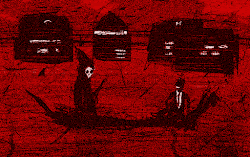

In [12]:
get_preview_image(df.loc[201638])

In [16]:
df.iloc[295520]

creator                           0x6f71e19e8b28963dfdfed04c4e6a217f0838aef2
price_crypto                                                      10854000.0
sale_usd                                                         5027323.158
description                VOX are unique collectibles, with provably ran...
is_animation                                                           False
name                                                 Dragon - Blue VOX #2054
collection_name                                           collectvoxmirandus
collection_description     [meet, vox, adorable, collectible, series, gal...
contract_scheme                                                       ERC721
sale_token                                                              GALA
id                                                      pOMhGH4BOa5kXuiNdMJT
instagram                                                        gogalagames
twitter                                                          gogalagames

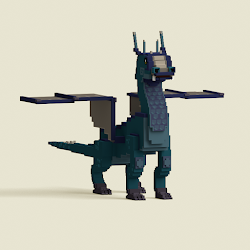

In [17]:
get_preview_image(df.loc[295520])

In [18]:
df.iloc[88329]

creator                           0x8c0928cf8cddd28bc01d0c9b662d7092253b8574
price_crypto                                                        300000.0
sale_usd                                                            927000.0
description                Decentraland is an Ethereum blockchain powered...
is_animation                                                           False
name                                                                    Home
collection_name                                                 decentraland
collection_description     [decentraland, ethereum, blockchain, power, vi...
contract_scheme                                                       ERC721
sale_token                                                              MANA
id                                                      QxhfyH0BVS2GQYVSUvUA
instagram                                                                   
twitter                                                         decentraland

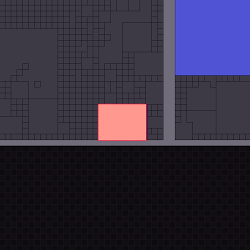

In [19]:
get_preview_image(df.loc[88329])

In [21]:
df.iloc[733091]

creator                                                    BoredApeYachtClub
price_crypto                                                           215.0
sale_usd                                                           715547.95
description                The Bored Ape Yacht Club is a collection of , ...
is_animation                                                           False
name                                                                        
collection_name                                            boredapeyachtclub
collection_description     [bored, ape, yacht, club, collection, unique, ...
contract_scheme                                                       ERC721
sale_token                                                               ETH
id                                                      Q1bfYH4B3CmUIj-JR4GC
instagram                                                  boredapeyachtclub
twitter                                                           BoredApeYC

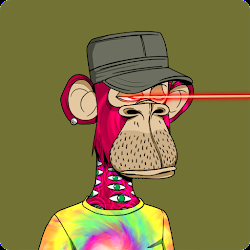

In [22]:
get_preview_image(df.loc[733091])

In [24]:
df.iloc[88329]

creator                           0x8c0928cf8cddd28bc01d0c9b662d7092253b8574
price_crypto                                                        300000.0
sale_usd                                                            927000.0
description                Decentraland is an Ethereum blockchain powered...
is_animation                                                           False
name                                                                    Home
collection_name                                                 decentraland
collection_description     [decentraland, ethereum, blockchain, power, vi...
contract_scheme                                                       ERC721
sale_token                                                              MANA
id                                                      QxhfyH0BVS2GQYVSUvUA
instagram                                                                   
twitter                                                         decentraland

## With z-score and y-binning

In [4]:
max(df['sale_usd'])

43912.4

In [74]:
df.iloc[1143070]

creator                                                     CoolCatsContract
price_crypto                                                            17.5
sale_usd                                                             43912.4
description                Cool Cats is a collection of , randomly genera...
is_animation                                                           False
name                                                          Cool Cat #3617
collection_name                                                cool-cats-nft
collection_description     [cool, cat, collection, randomly, generate, st...
contract_scheme                                                       ERC721
sale_token                                                               ETH
id                                                      Nh4rrn4B-_EH3z1smVAs
instagram                                                                   
twitter                                                          coolcatsnft

In [8]:
df[df['sale_usd'] == 43912.4]

,creator,price_crypto,sale_usd,description,is_animation,name,collection_name,collection_description,contract_scheme,sale_token,...,collection_created_year,image_path,word_count_coll_desc,unique_asset,instagram_account,twitter_account,z_sale_usd,z_twitter_follower,bin_log_usd,cat_usd
1143070,CoolCatsContract,17.5,43912.4,"Cool Cats is a collection of , randomly genera...",False,Cool Cat #3617,cool-cats-nft,"[cool, cat, collection, randomly, generate, st...",ERC721,ETH,...,2021,C:\nft_data\preview\Nh4rrn4B-_EH3z1smVAs_noext...,67,0,0,1,2.999865,0.505495,19,19


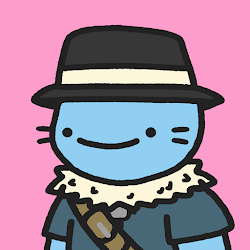

In [9]:
get_preview_image(df.loc[1143070])

In [11]:
df[df['cat_usd'] == 19]

,creator,price_crypto,sale_usd,description,is_animation,name,collection_name,collection_description,contract_scheme,sale_token,...,collection_created_year,image_path,word_count_coll_desc,unique_asset,instagram_account,twitter_account,z_sale_usd,z_twitter_follower,bin_log_usd,cat_usd
18,NeoTokyoCitadel,8.700,34537.9560,Welcome to Outer Neo Tokyo. Are you prepared t...,False,Character #1727,neotokyo-outer-identities,[],ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,1,0,0,0,2.329047,-0.088046,19,19
19,0x9056d15c49b19df52ffad1e6c11627f035c0c960,7.890,31322.3532,The MUTANT APE YACHT CLUB is a collection of u...,False,,mutant-ape-yacht-club,"[mutant, ape, yacht, club, collection, mutant,...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,20,0,0,0,2.098944,-0.088046,19,19
79,RTFKTCloneXVial,6.990,27749.4612,"CLONE X , next gen Avatars, by RTFKT and Taka...",False,CloneX #13562,clonex,"[clone, x, next, gen, avatar, rtfkt, takashi, ...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,8,0,1,1,1.843274,0.698688,19,19
147,0x9056d15c49b19df52ffad1e6c11627f035c0c960,7.600,30171.0880,The MUTANT APE YACHT CLUB is a collection of u...,False,,mutant-ape-yacht-club,"[mutant, ape, yacht, club, collection, mutant,...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,20,0,0,0,2.016561,-0.088046,19,19
282,RTFKTCloneXVial,7.990,31719.3412,"CLONE X , next gen Avatars, by RTFKT and Taka...",False,CloneX #11331,clonex,"[clone, x, next, gen, avatar, rtfkt, takashi, ...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,8,0,1,1,2.127352,0.698688,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149996,GhostsProject,10.999,27760.3761,"The black portal suddenly opened and , ghosts ...",False,Ghost #3563,ghostsproject,"[black, portal, suddenly, open, ghost, come, d...",ERC721,ETH,...,2021,C:\nft_data\preview\PB89r34B-_EH3z1s2Gj1_noext...,70,0,1,0,1.844055,-0.088046,19,19
1150032,BoredApeKennelClub,11.000,27762.9000,It gets lonely in the swamp sometimes. That s ...,False,,bored-ape-kennel-club,"[get, lonely, swamp, sometimes, every, ape, fo...",ERC721,ETH,...,2021,C:\nft_data\preview\PR9Ir34B-_EH3z1s1HMX_noext...,42,0,0,1,1.844236,2.003568,19,19
1150108,RTFKTCloneXVial,15.900,40130.0100,"CLONE X , next gen Avatars, by RTFKT and Taka...",False,CloneX #3494,clonex,"[clone, x, next, gen, avatar, rtfkt, takashi, ...",ERC721,ETH,...,2021,C:\nft_data\preview\Ex9kr34B-_EH3z1sZpKK_noext...,8,0,1,1,2.729204,0.830867,19,19
1150447,RTFKTCloneXVial,15.450,38994.2550,"CLONE X , next gen Avatars, by RTFKT and Taka...",False,CloneX #15593,clonex,"[clone, x, next, gen, avatar, rtfkt, takashi, ...",ERC721,ETH,...,2021,C:\nft_data\preview\ch9Lr34B-_EH3z1svHht_noext...,8,0,1,1,2.647931,0.830758,19,19


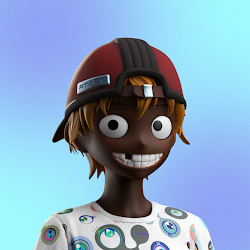

In [12]:
get_preview_image(df.loc[282])

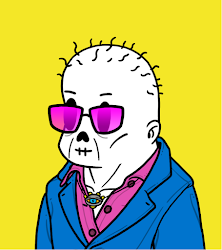

In [13]:
get_preview_image(df.loc[1149996])

In [17]:
df[df['cat_usd'] == 17]

,creator,price_crypto,sale_usd,description,is_animation,name,collection_name,collection_description,contract_scheme,sale_token,...,collection_created_year,image_path,word_count_coll_desc,unique_asset,instagram_account,twitter_account,z_sale_usd,z_twitter_follower,bin_log_usd,cat_usd
126,ImmortalMonks,2.9000,11512.65200,"After centuries of preparation, , Monks are ca...",False,Immortal Monks #1272,immortalmonks,"[century, preparation, monk, cast, away, solid...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,26,0,1,1,0.681397,-0.050513,17,17
192,0x6f71e19e8b28963dfdfed04c4e6a217f0838aef2,2.2200,8839.64040,"VOX are unique collectibles, with provably ran...",False,Human - Alchemist VOX #1106,collectvoxmirandus,"[meet, vox, adorable, collectible, series, gal...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,19,0,1,1,0.490121,0.668944,17,17
454,0x1b2ef9d5db72ea1103fc24eedd2226477409383a,2.2000,8733.73600,"A small, warty, amphibious creature that resid...",False,CrypToadz #711,cryptoadz-by-gremplin,"[cryptoadz, collection, small, amphibious, cre...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,27,0,0,1,0.482543,0.022553,17,17
468,WorldofWomen,2.0500,8138.25400,"World of Women: , unique, cool and diverse Wom...",False,Woman #9127,world-of-women-nft,"[community, celebrate, representation, inclusi...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,20,0,1,1,0.439931,0.143593,17,17
489,0x6f71e19e8b28963dfdfed04c4e6a217f0838aef2,2.4900,9885.00120,"VOX are unique collectibles, with provably ran...",False,Human - Stronghand VOX #4568,collectvoxmirandus,"[meet, vox, adorable, collectible, series, gal...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,19,0,1,1,0.564925,0.668870,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150515,PixelVaultDeployer,3.7000,9338.43000,The Founder s DAO NFT is a Fvckrender designed...,True,Pixel Vault Founder's DAO,punks-comic,"[meet, punk, everyone, favorite, misfit, crew,...",ERC721,ETH,...,2021,C:\nft_data\preview\RB9dr34B-_EH3z1sp4tR_noext...,14,0,0,1,0.525814,0.132705,17,17
1150569,0x18dd4e0eb8699ea4fee238de41ecfb95e32272f8,3.9000,9873.27900,A LAND is a digital piece of real estate in Th...,False,"LAND (-139, -69)",sandbox,"[sandbox, community, driven, platform, creator...",ERC721,WETH,...,2019,C:\nft_data\preview\ix9tr34B-_EH3z1sfpxt_noext...,44,0,0,1,0.564086,2.674013,17,17
1150581,0x1b2ef9d5db72ea1103fc24eedd2226477409383a,3.3000,8328.87000,"A small, warty, amphibious creature that resid...",False,CrypToadz #1982,cryptoadz-by-gremplin,"[cryptoadz, collection, small, amphibious, cre...",ERC721,ETH,...,2021,C:\nft_data\preview\ch9tr34B-_EH3z1sWpvD_noext...,27,0,0,1,0.453571,0.047552,17,17
1150624,Creepz_Overlord,4.7900,12089.48100,Join Cold Blooded Creepz in a multi season pla...,False,Cold Blooded Creepz #2837,genesis-creepz,"[genesis, creepz, grant, holder, free, creepz,...",ERC721,ETH,...,2022,C:\nft_data\preview\lB-Lr34B-_EH3z1sTbcN_noext...,79,0,1,0,0.722674,-0.088046,17,17


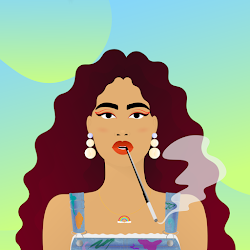

In [18]:
get_preview_image(df.loc[468])

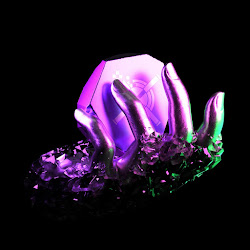

In [19]:
get_preview_image(df.loc[1150515])

In [73]:
df.iloc[1150581]

creator                           0x1b2ef9d5db72ea1103fc24eedd2226477409383a
price_crypto                                                             3.3
sale_usd                                                             8328.87
description                A small, warty, amphibious creature that resid...
is_animation                                                           False
name                                                         CrypToadz #1982
collection_name                                        cryptoadz-by-gremplin
collection_description     [cryptoadz, collection, small, amphibious, cre...
contract_scheme                                                       ERC721
sale_token                                                               ETH
id                                                      ch9tr34B-_EH3z1sWpvD
instagram                                                                   
twitter                                                         cryptoadzNFT

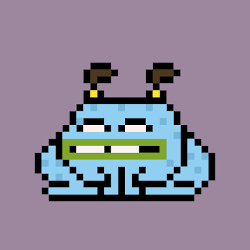

In [72]:
get_preview_image(df.loc[1150581])

In [20]:
df[df['cat_usd'] == 11]

,creator,price_crypto,sale_usd,description,is_animation,name,collection_name,collection_description,contract_scheme,sale_token,...,collection_created_year,image_path,word_count_coll_desc,unique_asset,instagram_account,twitter_account,z_sale_usd,z_twitter_follower,bin_log_usd,cat_usd
6,romeoblaze,0.079,313.62052,The limited collection of lazy bunnies who los...,False,#4684,lbo,"[lazy, bunny, lose, home, wildfire, look, new,...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,12,0,1,1,-0.119986,0.038035,11,11
11,CRYPPO-GENESIS,0.080,317.59040,CRYPPO is an adventurous Hippopotamus Cryptono...,True,CRYPPO #964,cryppo,"[discover, adventure, cryppo, first, hippopota...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,36,0,1,1,-0.119702,-0.078507,11,11
17,Hearts-Deployer,0.085,337.43980,The Heart Project is a community run creative ...,False,Heart #7674,heartnftproject,"[heart, project, community, run, creative, stu...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,44,0,1,1,-0.118281,-0.020435,11,11
28,NEKO-team,0.078,309.65064,NEKOMEKAs are the cutest and dopest VOXEL ROBO...,False,NEKOMEKA #02258,nekomeka,"[nekomekas, cutest, dopest, voxel, robot, nfts...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,51,0,0,0,-0.120270,-0.088046,11,11
30,fityeth,0.075,297.74100,"A collection of , Post Apocalypse themed Chimp...",False,Apocalyptic Apes #2213,apocalyptic-apes,"[collection, post, apocalypse, theme, chimp, n...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,19,0,1,1,-0.121122,-0.064709,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150678,0xd3f27738a6ca4ad6201ee934e5fcf3756a46aedb,0.140,353.34600,"Persona Lamps is a collection of , LAMP NFTs w...",False,Persona Lamp #3044,persona-lamps,"[persona, lamp, collection, lamp, nfts, variat...",ERC721,ETH,...,2021,C:\nft_data\preview\UR-Wr34B-_EH3z1sQ8Sc_noext...,40,0,0,1,-0.117143,-0.084598,11,11
1150680,0xd3f27738a6ca4ad6201ee934e5fcf3756a46aedb,0.120,302.86800,"Persona Lamps is a collection of , LAMP NFTs w...",False,Persona Lamp #3045,persona-lamps,"[persona, lamp, collection, lamp, nfts, variat...",ERC721,ETH,...,2021,C:\nft_data\preview\zB-Wr34B-_EH3z1sLsPx_noext...,40,0,0,1,-0.120755,-0.084598,11,11
1150683,0x13a79956554bb3c7193ffabbce14e653cf475846,0.180,454.30200,"EVOL, a year old Cherub, has been cast down to...",False,EVOL #3502,g-evols,"[g, evol, randomly, generate, trait, one, uniq...",ERC721,ETH,...,2021,C:\nft_data\preview\th-Wr34B-_EH3z1sLcNG_noext...,27,0,0,1,-0.109919,0.016859,11,11
1150703,raminnasibov,0.130,328.10700,,False,661,metamindz,"[minimalist, handmade]",ERC1155,ETH,...,2021,C:\nft_data\preview\lh-ar34B-_EH3z1szMti_noext...,2,0,0,1,-0.118949,-0.073123,11,11


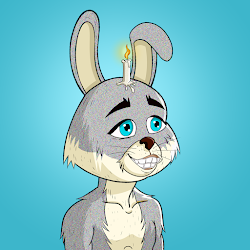

In [22]:
get_preview_image(df.loc[6])

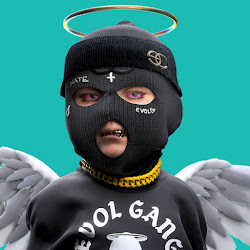

In [24]:
get_preview_image(df.loc[1150683])

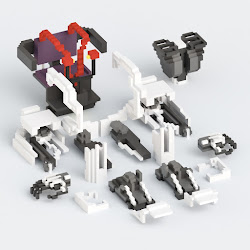

In [25]:
get_preview_image(df.loc[28])

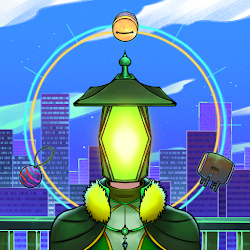

In [27]:
get_preview_image(df.loc[1150678])

In [28]:
df[df['cat_usd'] == 8]

,creator,price_crypto,sale_usd,description,is_animation,name,collection_name,collection_description,contract_scheme,sale_token,...,collection_created_year,image_path,word_count_coll_desc,unique_asset,instagram_account,twitter_account,z_sale_usd,z_twitter_follower,bin_log_usd,cat_usd
0,WoofpackNFT,0.0195,76.970985,"WoofPack is a generative NFT collection of , e...",False,Woofpack #1398,woofpacknft,"[freedom, woofpack, adorable, algorithmically,...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,81,0,1,1,-0.136920,-0.043164,8,8
1,PudgyPenguinsKing,0.0180,71.050140,"Lil Pudgys are a collection of , randomly gene...",False,Lil Pudgy #2168,lilpudgys,"[lil, pudgys, collection, randomly, generate, ...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,24,0,0,1,-0.137344,0.079679,8,8
3,CryptoRastas_Team,0.0200,78.944600,Cryptorasta Shannon Stone is a doctor from New...,False,Cryptorasta #04798,cryptorastas-collection,"[nft, collection, reggae, culture, info, crypt...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,10,0,1,1,-0.136779,-0.068195,8,8
24,FivePenguins,0.0179,71.060852,", majestic penguin squads designed by Gavin S...",True,Five Penguins #1221,fivepenguins,"[five, penguin, generative, art, series, gavin...",ERC721,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,66,0,1,1,-0.137343,-0.038191,8,8
50,AveryFamous,0.0150,59.548200,White Faced Capuchin : Original work by Avery ...,False,White-Faced Capuchin,bofanimals,"[collectable, nft, project, avery, famous, han...",ERC1155,ETH,...,2021,..\..\opensea_scapper\opensea_nft_scrapper\dat...,10,0,0,1,-0.138167,-0.062189,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150670,ZombieFrens,0.0320,80.764800,Zombie Frens is a collection on the Ethereum b...,False,ZombieFren #4023,zombiefrens,"[sell, minute, zombie, frens, collection, ethe...",ERC721,ETH,...,2022,C:\nft_data\preview\KB-Wr34B-_EH3z1sQcSr_noext...,18,0,1,0,-0.136648,-0.088046,8,8
1150684,0xf510c7341697b907d1699305746c76fecf4dee05,0.0330,83.288700,These Princesses are the romantic counterparts...,False,#2654,chill-princesses,[],ERC721,ETH,...,2022,C:\nft_data\preview\vB-Wr34B-_EH3z1sLsNB_noext...,1,0,1,0,-0.136468,-0.088046,8,8
1150685,ZombieFrens,0.0298,75.212220,Zombie Frens is a collection on the Ethereum b...,False,ZombieFren #8754,zombiefrens,"[sell, minute, zombie, frens, collection, ethe...",ERC721,ETH,...,2022,C:\nft_data\preview\sB-Wr34B-_EH3z1sLcMP_noext...,18,0,1,0,-0.137046,-0.088046,8,8
1150709,0x07a5dc49c58a4418feb52426601abe556ca55cbe,0.0230,58.049700,Repeat Offenders is a collection of procedural...,False,Repeat Offender #656,repeat-offenders,"[repeat, offender, gerhard, human, http, gerha...",ERC721,ETH,...,2022,C:\nft_data\preview\bx-ar34B-_EH3z1syss9_noext...,26,0,0,0,-0.138274,-0.088046,8,8


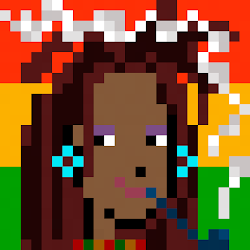

In [29]:
get_preview_image(df.loc[3])

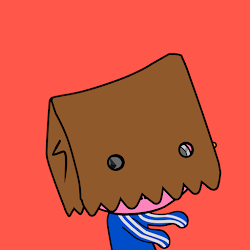

In [30]:
get_preview_image(df.loc[1150670])

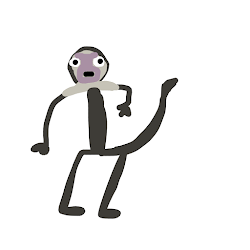

In [31]:
get_preview_image(df.loc[50])

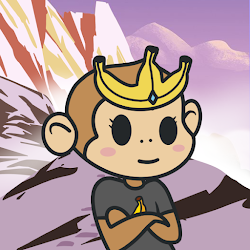

In [32]:
get_preview_image(df.loc[1150684])

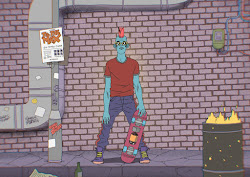

In [33]:
get_preview_image(df.loc[1150713])

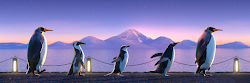

In [34]:
get_preview_image(df.loc[24])

### Lin Reg Price vs Twitter followers

https://realpython.com/linear-regression-in-python/

In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
x = np.array(df['sale_time'])

In [15]:
y = np.array(df['sale_usd'])

In [23]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [17]:
model_reg = LinearRegression()

In [20]:
model_reg.fit(x, y)

LinearRegression()

In [56]:
r_sq = model_reg.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.15987218987868412


In [57]:
print(f"intercept: {model_reg.intercept_}")
print(f"slope: {model_reg.coef_}")

intercept: [973.26089758]
slope: [[0.02759671]]


In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
sns.set_theme(color_codes=True)

<AxesSubplot:>

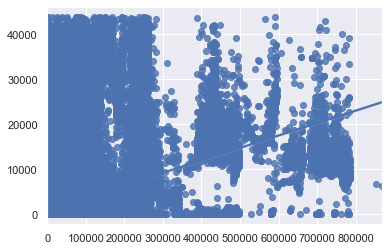

In [60]:
sns.regplot(x=x, y=y)

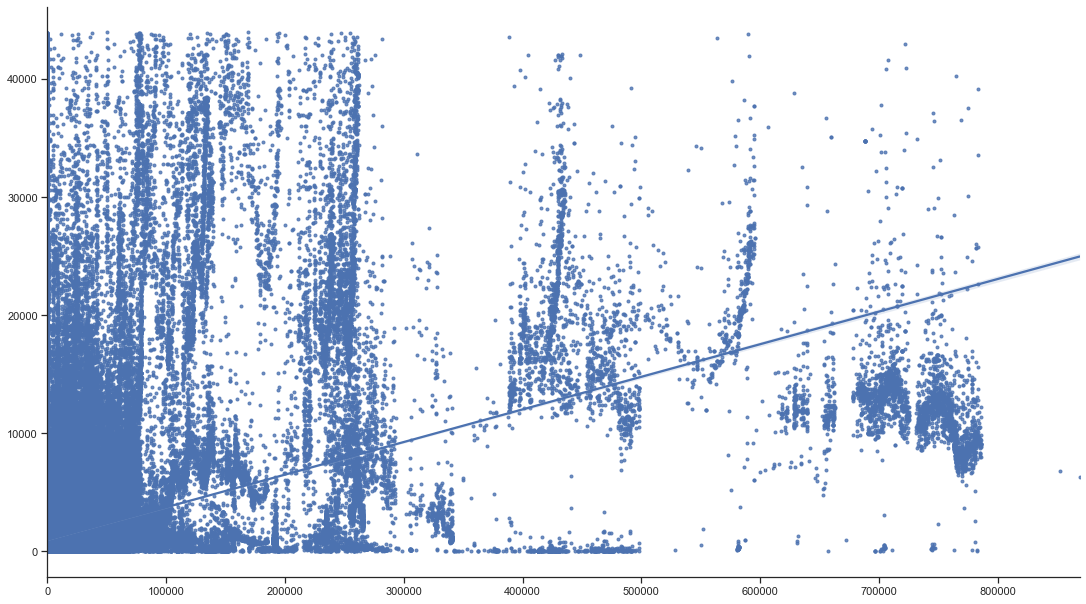

In [67]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x, y, ax=ax, marker='.')
sns.despine()

Sales time

C:\Users\bb1\miniconda3\envs\deep\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


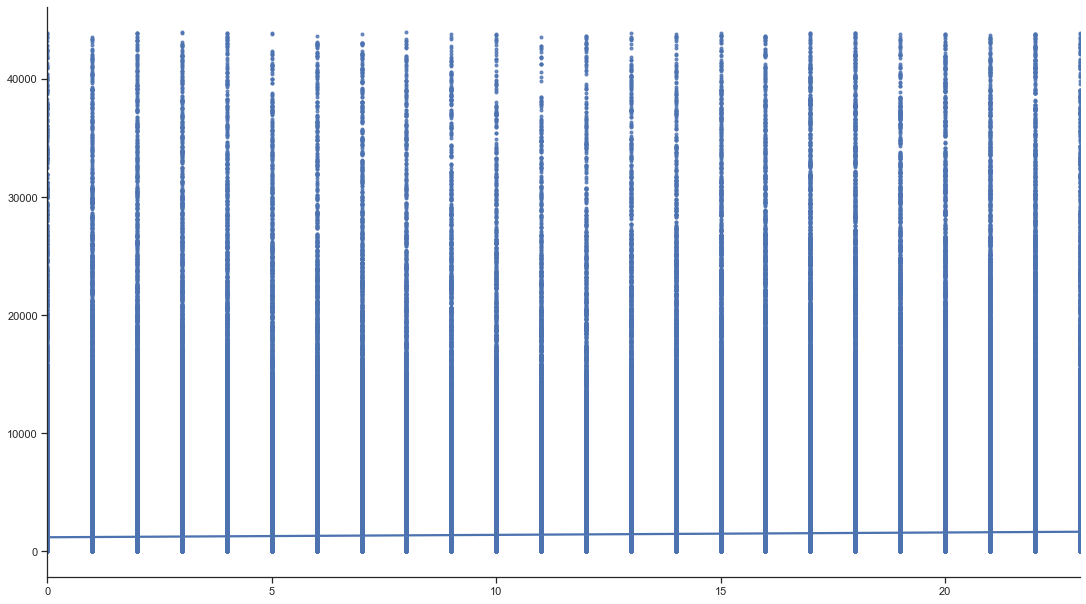

In [18]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x, y, ax=ax, marker='.')
sns.despine()

In [21]:
r_sq_time = model_reg.score(x, y)
print(f"coefficient of determination: {r_sq_time}")

coefficient of determination: 0.001486920614839904


### Lin Reg price vs Words

In [68]:
x_w = np.array(df['word_count_coll_desc']).reshape((-1, 1))

In [69]:
model_reg.fit(x_w, y)

LinearRegression()

In [70]:
r_sq = model_reg.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model_reg.intercept_}")
print(f"slope: {model_reg.coef_}")

coefficient of determination: -5839.813926027694
intercept: [1244.06290129]
slope: [[5.07069023]]


C:\Users\bb1\miniconda3\envs\deep\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


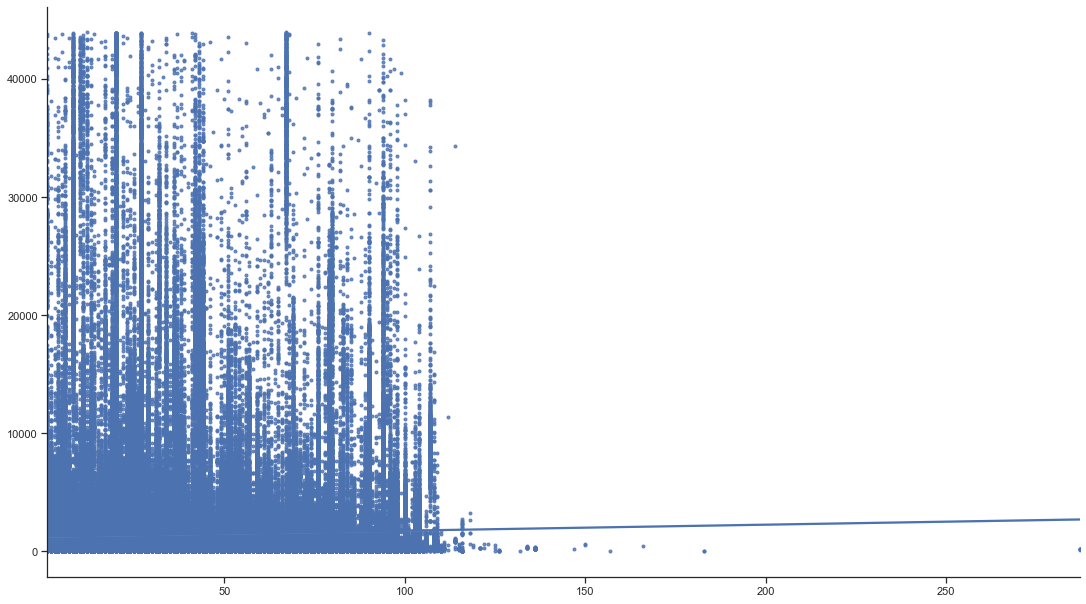

In [71]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x_w, y, ax=ax, marker='.')
sns.despine()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150715 entries, 0 to 1150714
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   creator                  1150715 non-null  category
 1   price_crypto             1150205 non-null  float64 
 2   sale_usd                 1150715 non-null  float64 
 3   description              1150715 non-null  object  
 4   is_animation             1150715 non-null  category
 5   name                     1150715 non-null  category
 6   collection_name          1150715 non-null  category
 7   collection_description   1150715 non-null  object  
 8   contract_scheme          1150715 non-null  category
 9   sale_token               1150715 non-null  category
 10  id                       1150715 non-null  object  
 11  instagram                1150715 non-null  category
 12  twitter                  1150715 non-null  category
 13  img_path                 11

In [39]:
df['creator'][:5]

0                                   WoofpackNFT
1                             PudgyPenguinsKing
2    0x4fe4e666be5752f1fdd210f4ab5de2cc26e3e0e8
3                             CryptoRastas_Team
4    0x92bce497efe4332a8f611004f67e14093b5d0e8c
Name: creator, dtype: category
Categories (21706, object): ['', '--O', '--vvH--', '-0xen-', ..., 'zubymoves', 'zukkyzukky', 'zwMalachite', 'zyzzcn']

In [37]:
df['creator'][:5]

913660      70
228961     128
354204     527
866830      41
992030    1093
Name: creator, dtype: category
Categories (4096, int64): [0, 1, 2, 3, ..., 4092, 4093, 4094, 4095]

In [ ]:
corr = df[['creator', 'is_animation', 'name',
       'collection_name', 'contract_scheme',
       'sale_token', 'id', 'instagram', 'twitter', 
       'twitter_follower', 'sale_time',
       'collection_created_year', 'word_count_coll_desc', 'unique_asset',
       'instagram_account', 'twitter_account', 'z_twitter_follower',
        'y']].corr()
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr ,annot=True,linewidth=.5,fmt='1f');
# 'contract_scheme_3',

In [38]:
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2

    return (ssb / (ssb + ssw))**.5

In [7]:
cols = ['creator', 'is_animation', 'name',
       'collection_name', 'contract_scheme',
       'sale_token', 'instagram', 'twitter', 
       'twitter_follower', 'sale_time', 'collection_created_year', 
        'word_count_coll_desc', 'unique_asset',
       'instagram_account', 'twitter_account', 'z_twitter_follower']

colEta = {}
for colName in cols:
    coef = correlation_ratio(df[colName], df['y'])
    colEta[colName] = coef
    print('{} Eta: {:.4f}'.format(colName, coef))

creator Eta: 0.8229
is_animation Eta: 0.1022
name Eta: 0.1266
collection_name Eta: 0.8509
contract_scheme Eta: 0.2075
sale_token Eta: 0.1245
instagram Eta: 0.5022
twitter Eta: 0.6861
twitter_follower Eta: 0.5669
sale_time Eta: 0.1049
collection_created_year Eta: 0.1034
word_count_coll_desc Eta: 0.3006
unique_asset Eta: 0.0034
instagram_account Eta: 0.1261
twitter_account Eta: 0.0862
z_twitter_follower Eta: 0.5669


In [37]:
cols = ['creator', 'is_animation', 'name',
       'collection_name', 'contract_scheme',
       'sale_token', 'instagram', 'twitter', 
       'twitter_follower', 'sale_time', 'collection_created_year', 
        'word_count_coll_desc', 'unique_asset',
       'instagram_account', 'twitter_account', 'z_twitter_follower', 'cat_usd']

eta_matrix = []
for colName in cols:
    row = []
    for colName2 in cols:
        coef = correlation_ratio(df[colName], df[colName2])
        row.append(coef)
        print('{}<->{} : {:.4f}'.format(colName, colName2, coef))
    eta_matrix.append(row)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [45]:
matrix = []
for colName in cols:
    arr = [colEta[colName] for colName in cols]
    idx = cols.index(colName)
    for i in range(idx):
        last = arr.pop()
        arr.insert(0, last)
    matrix.append(arr)
    
corr_eta = pd.DataFrame(matrix)